## Project 3: Numerical Methods for Differential Equations

## Task 1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve
from scipy.sparse.linalg import eigs
from mpl_toolkits.mplot3d import axes3d

In [3]:
def toeplitz_like(dim):
    return csr_matrix((diags([1, -2, 1], [-1, 0, 1], shape=(dim, dim))) * (dim + 1)**2)

def euler_step(A: np.array, y_n: np.array, h: float, alpha, beta):
    return np.concatenate(([alpha], y_n + h * A @ y_n.T, [beta]))

## Task 1.1

In [4]:
def euler_solve(g_0, N, M, t_end, alpha, beta):
    xx = np.linspace(0, 1, N+2)
    tt = np.linspace(0, t_end, M+1)
    Y = np.zeros((M+1, N+2))
    Y[0,:] = g_0(xx)
    toep = toeplitz_like(N)
    for i in range(M):
        Y[i+1,:] = euler_step(toep, Y[i,:][1:-1], t_end/M, alpha, beta)
    return Y, tt, xx

In [5]:
def plot3d(Y, Xgrid, tgrid):
     T, X = np.meshgrid(np.transpose(tgrid), Xgrid)

     fig = plt.figure(figsize=(10, 10))  
     ax = fig.add_subplot(111, projection='3d')
     ax.plot_surface(T, X, np.transpose(Y))

     ax.set_xlabel('Time')
     ax.set_ylabel('Space')
     ax.set_zlabel('Value')

     plt.show()

## Test Task 1.1

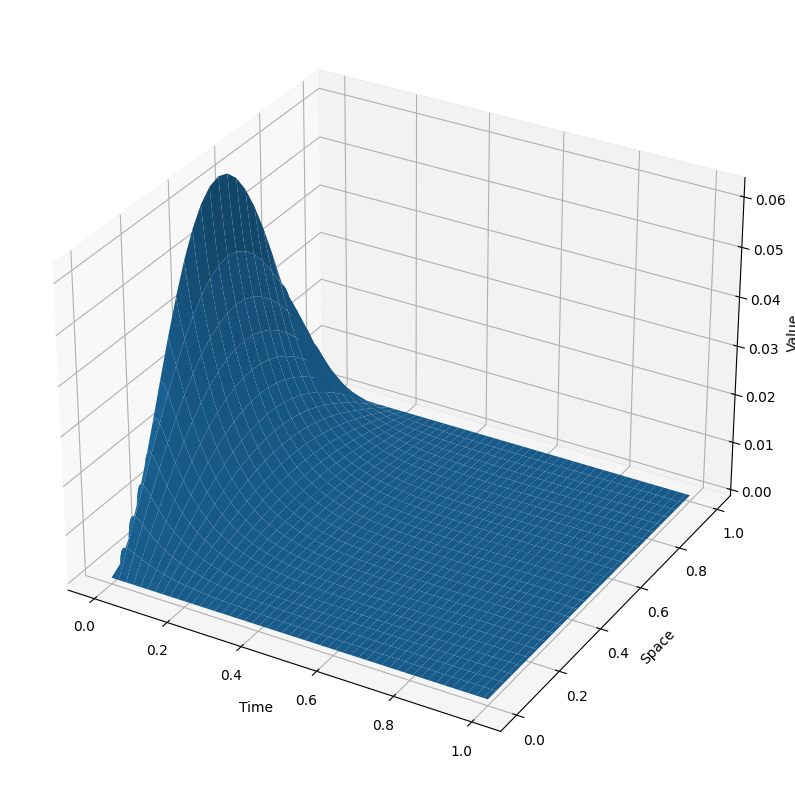

In [6]:
N = 25
M = 2*51**2
t_end = 1
alpha = 0
beta = 0

Y, t_grid, x_grid = euler_solve(lambda x : (x*(1-x))**2, N, M, t_end, alpha, beta)
plot3d(Y, x_grid, t_grid)


##  Experimental Determination of CFL condition

Below, a series of approximation are done for different values of the CFL constant $\mu=\frac{\Delta t}{\Delta x^2}$ to determine for which values the explicit Euler method converges.

In [20]:
def test_conv(mu, values, convergence):
    N = 25
    M = int(((N+1)**2)/mu)
    t_end = 1
    alpha = 0
    beta = 0
    Y, t_grid, x_grid = euler_solve(lambda x : (x*(1-x))**2, N, M, t_end, alpha, beta)
    
    if(np.sum(abs(Y[-1,:]))<0.001):
        print('CFL=', mu, "Converges")
        values.append(f"CFL={mu}")
        convergence.append("Converges")
    else:
        print('CFL=', mu, "Diverges")
        values.append(f"CFL={mu}")
        convergence.append("Diverges")


In [23]:
values = []
convergence = []



for k in range(10):
    mu = (k+1) / 10 
    test_conv(mu, values, convergence)
    
df = pd.DataFrame({
    "values": values,
    "convergence": convergence,
    })

df.style \
.format(precision=3, thousands=".", decimal=",") \
.format_index(str.upper, axis=1)
display(df)



CFL= 0.1 Converges
CFL= 0.2 Converges
CFL= 0.3 Converges
CFL= 0.4 Converges
CFL= 0.5 Converges
CFL= 0.6 Diverges
CFL= 0.7 Diverges
CFL= 0.8 Diverges
CFL= 0.9 Diverges
CFL= 1.0 Diverges


/var/folders/_f/c8hvdtx948gb848x9xmt79tr0000gn/T/ipykernel_85362/4162189152.py:5: RuntimeWarning: invalid value encountered in add
  return np.concatenate(([alpha], y_n + h * A @ y_n.T, [beta]))


,values,convergence
0,CFL=0.1,Converges
1,CFL=0.2,Converges
2,CFL=0.3,Converges
3,CFL=0.4,Converges
4,CFL=0.5,Converges
5,CFL=0.6,Diverges
6,CFL=0.7,Diverges
7,CFL=0.8,Diverges
8,CFL=0.9,Diverges
9,CFL=1.0,Diverges


From the above broad testing, we can determine that the line of convergence is in the intervall $\mu\in[5,6)$.

In [9]:
testcases = [num/100 for num in range(50, 60)]
for test in testcases:
    test_conv(test)

CFL= 0.5 Converges
CFL= 0.51 Diverges
CFL= 0.52 Diverges
CFL= 0.53 Diverges
CFL= 0.54 Diverges
CFL= 0.55 Diverges
CFL= 0.56 Diverges
CFL= 0.57 Diverges
CFL= 0.58 Diverges
CFL= 0.59 Diverges


The inteval is now narrowed down to $\mu\in[0.5,0.51)$ and further experiments are conducted

In [10]:
def conv(mu):
    N = 25
    M = int(((N+1)**2)/mu)
    t_end = 1
    alpha = 0
    beta = 0
    Y, t_grid, x_grid = euler_solve(lambda x : (x*(1-x))**2, N, M, t_end, alpha, beta)
    if(np.sum(abs(Y[-1,:]))<0.00005):
        return True
    else:
        return False
    
mu = 0.505
while(not conv(mu)):
    mu -= (mu - 0.5)/2
print(mu)

0.50125


With a tolerance of $0.00005$, the first value of convergence is $\mu = 0.50125$ and for smaller values, the code takes too long to run without further optimization which leaves the experimenta result och the maximal CFL condition in the interval $\mu\in[0.5, 0.50125)$ which is very close to the theoretical value of $\frac{1}{2}$.

Visualisation of divirging solution:

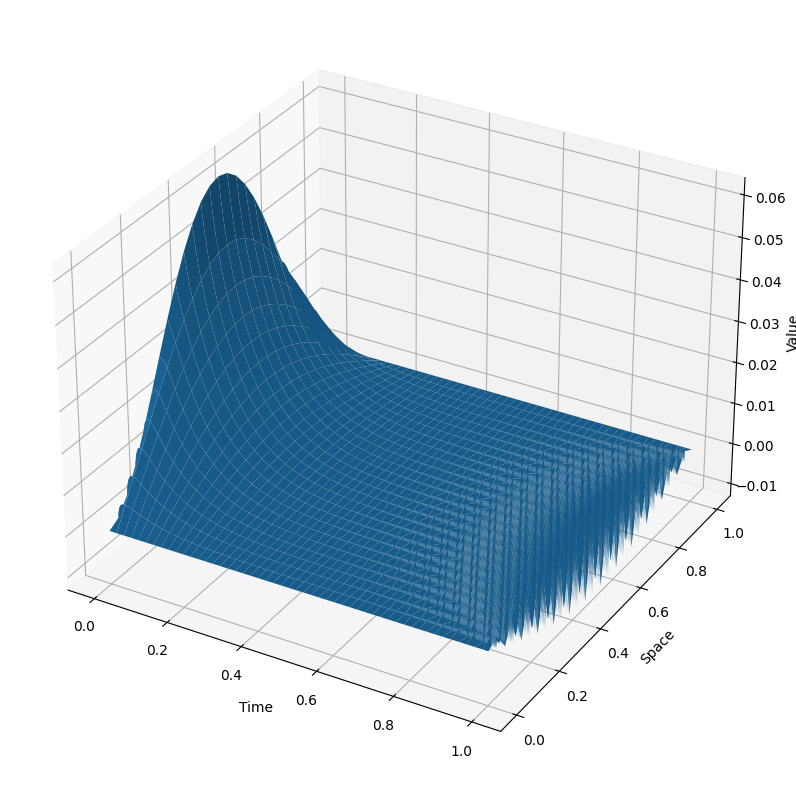

In [46]:
mu = 0.503
N = 25
M = int(((N+1)**2)/mu)
t_end = 1
alpha = 0
beta = 0
Y, t_grid, x_grid = euler_solve(lambda x : (x*(1-x))**2, N, M, t_end, alpha, beta)
plot3d(Y, x_grid, t_grid)

## Task 1.2